In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'improved_ff_geniesys/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

FF = imp.load_source('FF_functions',lib_function_dir+'FF_functions.py')

Welcome to JupyROOT 6.18/04
N_tot =  4.10331109202e+31   flux=  1.58051463543e+11 for pot:  2.144e+20


In [2]:
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)

In [3]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [4]:
from array import array
#mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#mom_bins = [ 0.00, 0.225, 0.28, 0.33, 0.39, 0.52, 0.78, 1.21, 2.5]

mom_bins = {}
#mom_bins.Append()
mom_bins[0] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[1] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[2] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[3] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[4] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[5] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[6] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[7] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[8] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]

theta_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]

len_theta = len(theta_bins) - 1
len_mom = {}
sum_bins = 0
for i in range(len_theta):
    len_mom[i] = len(mom_bins[i]) - 1
    #print len_mom[i]
    sum_bins+=len_mom[i]


In [5]:
NumberOfFiles = 5000
POT_file = 5e8
activeVol_Area = 128.175*2*116.5*2
pot_data = 2.144e+20

path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
f_flux_int = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')
h_flux_cv = f_flux_int.Get("hEnumu_cv")
flux_cv = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*pot_data

roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))

N_tot = roh_data*N_A*N_nucleons*V_fid/mol

print 'N_tot = ',N_tot,'  flux= ',flux_cv, 'for pot: ', pot_data

N_tot =  4.10331109202e+31   flux=  1.58051463543e+11 for pot:  2.144e+20


In [6]:
#store all histograms needed in one file: bkg, smearing, covariance
if(1):
    path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'

    f_cv = ROOT.TFile.Open(path_detsys+'xsec_detsys_CV_2D_t/xsec_detsys_CV_2D.root', 'read')
    f_dedx = ROOT.TFile.Open(path_detsys+'xsec_detsys_dEdx_2D_t/xsec_detsys_dEdx_2D.root', 'read')
    f_LYatt = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYAtt_2D_t/xsec_detsys_LYAtt_2D.root', 'read')
    f_LYdown = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYdown_2D_t/xsec_detsys_LYdown_2D.root', 'read')
    f_LYray = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYRay_2D_t/xsec_detsys_LYRayleigh_2D.root', 'read')
    f_recomb2 = ROOT.TFile.Open(path_detsys+'xsec_detsys_recomb2_2D_t/xsec_detsys_recomb2_2D.root', 'read')
    f_sce = ROOT.TFile.Open(path_detsys+'xsec_detsys_SCE_2D_t/xsec_detsys_SCE_2D.root', 'read')
    f_waxz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireAngleXZ_2D_t/xsec_detsys_WireAngleXZ_2D.root', 'read')
    f_wayz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireAngleYZ_2D_t/xsec_detsys_WireAngleYZ_2D.root', 'read')
    f_wmx = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireModX_2D_t/xsec_detsys_WireModX_2D.root', 'read')
    f_wmyz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireModYZ_2D_t/xsec_detsys_WireModYZ_2D.root', 'read')

    f_all = ROOT.TFile.Open(path_detsys+'xsec_detsys_all_2D_t/Detector_systematic_2D.root', 'read')
    
    h_true_cv = f_cv.Get('h_gen_all')
    h_sel_cv = f_cv.Get('h_sel_all')


    h_bkg_cv = f_cv.Get('h_bkg_all')
    h_bkg_dedx = f_dedx.Get('h_bkg_all')
    h_bkg_LYatt = f_LYatt.Get('h_bkg_all')
    h_bkg_LYdown = f_LYdown.Get('h_bkg_all')
    h_bkg_LYray = f_LYray.Get('h_bkg_all')
    h_bkg_recomb2 = f_recomb2.Get('h_bkg_all')
    h_bkg_sce = f_sce.Get('h_bkg_all')
    h_bkg_waxz = f_waxz.Get('h_bkg_all')
    h_bkg_wayz = f_wayz.Get('h_bkg_all')
    h_bkg_wmx = f_wmx.Get('h_bkg_all')
    h_bkg_wmyz = f_wmyz.Get('h_bkg_all')

    h_smear_cv = f_cv.Get('h_smearing')
    h_smear_dedx = f_dedx.Get('h_smearing')
    h_smear_LYatt = f_LYatt.Get('h_smearing')
    h_smear_LYdown = f_LYdown.Get('h_smearing')
    h_smear_LYray = f_LYray.Get('h_smearing')
    h_smear_recomb2 = f_recomb2.Get('h_smearing')
    h_smear_sce = f_sce.Get('h_smearing')
    h_smear_waxz = f_waxz.Get('h_smearing')
    h_smear_wayz = f_wayz.Get('h_smearing')
    h_smear_wmx = f_wmx.Get('h_smearing')
    h_smear_wmyz = f_wmyz.Get('h_smearing')

    #save all whats needed
    RootFile = ROOT.TFile(outputdir+"FF_detsys.root","RECREATE");
    #blbla.Write('dfdfs')
    h_true_cv.Write('h_true_cv')
    h_sel_cv.Write('h_sel_cv')
    
    h_bkg_cv.Write('h_bkg_cv')
    h_bkg_dedx.Write('h_bkg_dedx')
    h_bkg_LYatt.Write('h_bkg_LYatt')
    h_bkg_LYdown.Write('h_bkg_LYdown')
    h_bkg_LYray.Write('h_bkg_LYray')
    h_bkg_recomb2.Write('h_bkg_recomb2')
    h_bkg_sce.Write('h_bkg_sce')
    h_bkg_waxz.Write('h_bkg_waxz')
    h_bkg_wayz.Write('h_bkg_wayz')
    h_bkg_wmx.Write('h_bkg_wmx')
    h_bkg_wmyz.Write('h_bkg_wmyz')

    h_smear_cv.Write('h_smear_cv')
    h_smear_dedx.Write('h_smear_dedx')
    h_smear_LYatt.Write('h_smear_LYatt')
    h_smear_LYdown.Write('h_smear_LYdown')
    h_smear_LYray.Write('h_smear_LYray')
    h_smear_recomb2.Write('h_smear_recomb2')
    h_smear_sce.Write('h_smear_sce')
    h_smear_waxz.Write('h_smear_waxz')
    h_smear_wayz.Write('h_smear_wayz')
    h_smear_wmx.Write('h_smear_wmx')
    h_smear_wmyz.Write('h_smear_wmyz')

    RootFile.Close()

In [7]:
def smear_plot(h_true):
    if h_true.GetNbinsX() != 43:
        h_true_this = ROOT.TH1F('h_true_this',"h_true_this",43,0,43)
        for i in range(43):
            h_true_this.SetBinContent(i+1,h_true.GetBinContent(i+1))
    else:
        h_true_this = h_true.Clone()
    h_smear = f_cv.Get('h_smearing')
    smear_mat = FF.plot2arr(h_smear,2)
    eff_vec = FF.plot2arr(h_eff,1)
    true_vec = FF.plot2arr(h_true_this,1)
    smear_mat = smear_mat*eff_vec
    reco_vec = true_vec.dot(smear_mat)
    h_reco = FF.arr2plot(reco_vec)
    
    return h_reco

In [8]:
def return_detsys_covar(h_true,this_pot):
    #print 'go into function'
    #calculate the covariance for the the prediction
    path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff/'
    f_det = ROOT.TFile.Open(path_detsys+'FF_detsys.root', 'read')
    para = ['dedx','LYatt','LYdown','LYray','recomb2','sce','waxz','wayz','wmx','wmyz']
    #print 'Opend file'
    h_true_cv = h_true.Clone()
    h_bkg_cv = f_det.Get('h_bkg_cv')
    h_bkg_cv.Scale(this_pot/9.457e+18)
    h_smear_cv = f_det.Get('h_smear_cv')
    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    
    path_ext = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_ext = ROOT.TFile.Open(path_ext+'xsec_2D_Run3_wighted.root', 'read')
    h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
    h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
        h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
            h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
    h_ext.Scale(this_pot/2.144e+20)
    h_dirt.Scale(this_pot/2.144e+20)
    
    ext_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext.GetBinContent(i+1)
        dirt_vec[i] = h_dirt.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)
    #print 'filled vecotrs'
    reco_vec = true_vec.dot(smear_mat)

    bkg_vec_det = np.zeros((len(para),num_bins))
    reco_vec_det = np.zeros((len(para),num_bins))
    smear_mat_det = np.zeros((len(para),num_bins,num_bins))

    #sig_vec_det = np.zeros((len(para),num_bins)) # signal + bkg prediction
    res_vec_det = np.zeros((len(para),num_bins)) # residual
    res_vec = np.zeros((num_bins)) # quadratic sum


    h_bkg_det = []
    h_smear_det = []
    #print 'go into loop'
    for i,x in enumerate(para):
        h_bkg_det.append(f_det.Get('h_bkg_'+x))
        h_bkg_det[i].Scale(this_pot/9.457e18)
        h_smear_det.append(f_det.Get('h_smear_'+x))
        for j in range(num_bins):
            bkg_vec_det[i][j] = h_bkg_det[i].GetBinContent(j+1)
            for k in range(num_bins):
                smear_mat_det[i][j][k] = h_smear_det[i].GetBinContent(j+1,k+1)
        reco_vec_det[i]= true_vec.dot(smear_mat_det[i])
        #print reco_vec[1]+bkg_vec[1], reco_vec_det[i][1] + bkg_vec_det[i][1]
        res_vec_det[i] = ((reco_vec+bkg_vec) - (reco_vec_det[i] + bkg_vec_det[i]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)

        for j in range(num_bins):
            res_vec[j] += res_vec_det[i][j]*res_vec_det[i][j]

    frac_covar_det = np.zeros((num_bins,num_bins))
    for i,x in enumerate(para):
        for j in range(num_bins):
            for k in range(num_bins):
                frac_covar_det[j][k] += res_vec_det[i][j] * res_vec_det[i][k]

    return frac_covar_det

In [9]:
def return_other_covar(h_true,this_pot):
    weight_list = [ 'AxFFCCQEshape_UBGenie' , 'DecayAngMEC_UBGenie', 'NormCCCOH_UBGenie', 'NormNCCOH_UBGenie',\
                   'RPA_CCQE_Reduced_UBGenie','RPA_CCQE_UBGenie','ThetaDelta2NRad_UBGenie','Theta_Delta2Npi_UBGenie',\
                    'VecFFCCQEshape_UBGenie','XSecShape_CCMEC_UBGenie']
    w_list = [0,1,2,3,4,5,6,7,8,9]
    
    path_other = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/'
    f_other = ROOT.TFile.Open(path_other+'Other_Genie_2D.root', 'read')

    h_true_cv = h_true.Clone()
    num_bins = h_true_cv.GetNbinsX()
    frac_covar = np.zeros((num_bins,num_bins))
    
    path_ext = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_ext = ROOT.TFile.Open(path_ext+'xsec_2D_Run3_wighted.root', 'read')
    h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
    h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
        h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
            h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
    h_ext.Scale(this_pot/2.144e+20)
    h_dirt.Scale(this_pot/2.144e+20)
    
    ext_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))
    
    for i in range(num_bins):
        ext_vec[i] = h_ext.GetBinContent(i+1)
        dirt_vec[i] = h_dirt.GetBinContent(i+1)
        
    for w in w_list:
        #take first uiverse as cv
        h_bkg_cv = f_other.Get('h_bkg_all['+str(w)+'][0]')
        h_bkg_cv.Scale(this_pot/7.644e+18)
        h_smear_cv = f_other.Get('h_smearing['+str(w)+'][0]')
        h_eff_cv = f_other.Get('h_eff_all['+str(w)+'][0]')
        h_eff_cv.SetBinContent(5,1)
        h_eff_cv.SetBinContent(10,1)

        h_bkg_1 = f_other.Get('h_bkg_all['+str(w)+'][1]')
        h_bkg_1.Scale(this_pot/7.644e+18)
        h_smear_1 = f_other.Get('h_smearing['+str(w)+'][1]')
        h_eff_1 = f_other.Get('h_eff_all['+str(w)+'][1]')
        h_eff_1.SetBinContent(5,1)
        h_eff_1.SetBinContent(10,1)

        smear_mat = np.zeros((num_bins,num_bins))
        true_vec = np.zeros((num_bins))
        bkg_vec = np.zeros((num_bins))

        smear_mat1 = np.zeros((num_bins,num_bins))
        bkg_vec1 = np.zeros((num_bins))

        for i in range(num_bins):
            true_vec[i] = h_true_cv.GetBinContent(i+1)
            bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)

            bkg_vec1[i] = h_bkg_1.GetBinContent(i+1)
            for j in range(num_bins):
                smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)*h_eff_cv.GetBinContent(j+1)
                smear_mat1[i][j]= h_smear_1.GetBinContent(i+1,j+1)*h_eff_1.GetBinContent(j+1)

        reco_vec = true_vec.dot(smear_mat)
        reco_vec1 = true_vec.dot(smear_mat1)

        res_vec_other = ((reco_vec+bkg_vec) - (reco_vec1 + bkg_vec1))/(reco_vec+bkg_vec+ext_vec+dirt_vec)
        frac_covar_other = np.zeros((num_bins,num_bins))
        for j in range(num_bins):
            for k in range(num_bins):
                frac_covar_other[j][k] += res_vec_other[j] * res_vec_other[k]

        frac_covar += frac_covar_other
    return frac_covar


In [10]:
def return_all_covar(h_true,this_pot):
    path_all = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/'
    f_all = ROOT.TFile.Open(path_all+'All_Genie_2D.root', 'read')
    
    h_true_cv = h_true.Clone()
    h_bkg_cv = f_all.Get('h_bkg_all[0]')
    bin_counter=0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_all.Get('h_overlay_cv['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bkg_cv.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))

    h_bkg_cv.Scale(this_pot/7.644e+18)
    h_smear_cv = f_all.Get('h_smearing_cv')
    h_eff_cv = f_all.Get('h_eff_all_cv')
    h_eff_cv.SetBinContent(5,1)
    h_eff_cv.SetBinContent(10,1)
    
    path_ext = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_ext = ROOT.TFile.Open(path_ext+'xsec_2D_Run3_wighted.root', 'read')
    h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
    h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
        h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
            h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
    h_ext.Scale(this_pot/2.144e+20)
    h_dirt.Scale(this_pot/2.144e+20)

    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    ext_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext.GetBinContent(i+1)
        dirt_vec[i] = h_dirt.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)*h_eff_cv.GetBinContent(j+1)

    reco_vec = true_vec.dot(smear_mat)
    
    num_universe = 100

    bkg_vec_all = np.zeros((num_universe,num_bins))
    reco_vec_all = np.zeros((num_universe,num_bins))
    smear_mat_all = np.zeros((num_universe,num_bins,num_bins))

    res_vec_all = np.zeros((num_universe,num_bins))

    h_bkg_all = []
    h_smear_all = []
    h_eff_all = []
    for uni in range(num_universe):
        #do something
        h_bkg_all.append(f_all.Get('h_bkg_all['+str(0)+']'))
        bin_counter = 0
        for t_bin in range(len_theta): #len_theta
            h_temp = f_all.Get('h_overlay['+str(uni)+']['+str(t_bin)+']')
            for m_bin in range(len_mom[t_bin]):
                bin_counter+=1
                h_bkg_all[uni].SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
            del h_temp

        h_bkg_all[uni].Scale(this_pot/7.644e+18)
        h_smear_all.append(f_all.Get('h_smearing['+str(uni)+']'))
        h_eff_all.append(f_all.Get('h_eff_all['+str(uni)+']'))
        h_eff_all[uni].SetBinContent(5,1)
        h_eff_all[uni].SetBinContent(10,1)

        for j in range(num_bins):
            bkg_vec_all[uni][j] = h_bkg_all[uni].GetBinContent(j+1)
            for k in range(num_bins):
                smear_mat_all[uni][j][k] = h_smear_all[uni].GetBinContent(j+1,k+1)*h_eff_all[uni].GetBinContent(k+1)
        reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])
        res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)

    frac_covar_all = np.zeros((num_bins,num_bins))
    for uni in range(num_universe):
        for j in range(num_bins):
            for k in range(num_bins):
                frac_covar_all[j][k] += res_vec_all[uni][j] * res_vec_all[uni][k]
    frac_covar_all = frac_covar_all/num_universe
    
    del h_bkg_all
    del h_smear_all
    del h_eff_all
    
    return frac_covar_all

In [11]:
def return_flux_covar(h_true,this_pot):
    # give h_true_cv and POT since bkg is for specific POT
    # BACKGROUND, EFFICIENCY ARE IN ONE FILE, SMEARING IN OTHER...
    path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
    path_flux = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/'

    #weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim' ]
    weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
        'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
        'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
        'piplus_PrimaryHadronSWCentralSplineVariation' ]

    f_flux_int = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')

    f_flux_smear = []
    f_flux_bkg = []
    for i,x in enumerate(weight_list):
        f_flux_smear.append(ROOT.TFile.Open(path_flux+'xsec_2d_flux/root_output/'+x+'_Flux_systematic.root', 'read'))
        f_flux_bkg.append(ROOT.TFile.Open(path_flux+'xsec_2d_flux_rest/root_output/'+x+'_Flux_systematic_rest.root', 'read'))

    h_true_cv = h_true.Clone()
    h_bkg_cv = f_flux_bkg[0].Get('h_bkg_all[0][0]')
    bin_counter=0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_flux_bkg[0].Get('h_overlay_cv['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bkg_cv.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))

    NumberOfFiles = 5000
    POT_file = 5e8
    activeVol_Area = 128.175*2*116.5*2
    h_flux_cv = f_flux_int.Get("hEnumu_cv")
    flux_cv = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*this_pot

    h_bkg_cv.Scale(this_pot/7.644e+18)
    h_smear_cv = f_flux_smear[0].Get('h_smearing_cv')
    h_eff_cv = f_flux_bkg[0].Get('h_eff_all_cv')
    h_eff_cv.SetBinContent(5,1)
    h_eff_cv.SetBinContent(10,1)
    
    path_ext = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_ext = ROOT.TFile.Open(path_ext+'xsec_2D_Run3_wighted.root', 'read')
    h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
    h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
        h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
            h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
    h_ext.Scale(this_pot/2.144e+20)
    h_dirt.Scale(this_pot/2.144e+20)

    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    ext_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext.GetBinContent(i+1)
        dirt_vec[i] = h_dirt.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)*h_eff_cv.GetBinContent(j+1)

    reco_vec = true_vec.dot(smear_mat)

    num_universe = 100

    bkg_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    reco_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    smear_mat_flux = np.zeros((len(weight_list),num_universe,num_bins,num_bins))

    res_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    h_bkg_flux = []
    h_smear_flux = []
    h_eff_flux = []
    for i,x in enumerate(weight_list):
        h_bkg_flux.append([])
        h_smear_flux.append([])
        h_eff_flux.append([])
        for uni in range(num_universe):
            #do something
            h_bkg_flux[i].append(f_flux_bkg[i].Get('h_bkg_all[0]['+str(uni)+']'))
            bin_counter = 0
            for t_bin in range(len_theta): #len_theta
                h_temp = f_flux_bkg[i].Get('h_overlay[0]['+str(uni)+']['+str(t_bin)+']')
                for m_bin in range(len_mom[t_bin]):
                    bin_counter+=1
                    h_bkg_flux[i][uni].SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
                del h_temp
            
            h_bkg_flux[i][uni].Scale(this_pot/7.644e+18)
            h_smear_flux[i].append(f_flux_smear[i].Get('h_smearing[0]['+str(uni)+']'))
            h_eff_flux[i].append(f_flux_bkg[i].Get('h_eff_all[0]['+str(uni)+']'))
            h_eff_flux[i][uni].SetBinContent(5,1)
            h_eff_flux[i][uni].SetBinContent(10,1)

            h_flux_var = f_flux_int.Get('numu_ms_'+x+'/hEnumu_'+x+'_ms_'+str(uni))
            flux_var = h_flux_var.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*this_pot
            #print flux_cv, flux_var, (flux_var-flux_cv)/flux_var 
            for j in range(num_bins):
                bkg_vec_flux[i][uni][j] = h_bkg_flux[i][uni].GetBinContent(j+1)
                for k in range(num_bins):
                    smear_mat_flux[i][uni][j][k] = h_smear_flux[i][uni].GetBinContent(j+1,k+1)*h_eff_flux[i][uni].GetBinContent(k+1)
            reco_vec_flux[i][uni]= true_vec.dot(smear_mat_flux[i][uni])
            res_vec_flux[i][uni] = ((reco_vec+bkg_vec)/flux_cv - (reco_vec_flux[i][uni] + bkg_vec_flux[i][uni])/flux_var)/((reco_vec+bkg_vec+ext_vec+dirt_vec)/flux_cv)
    #print bkg_vec[1], bkg_vec_flux[i][uni][1]
    #print reco_vec[1], reco_vec_flux[i][uni][1]
    frac_covar_flux_vec = np.zeros((len(weight_list),num_bins,num_bins))
    for i,x in enumerate(weight_list):
        for uni in range(num_universe):
            for j in range(num_bins):
                for k in range(num_bins):
                    frac_covar_flux_vec[i][j][k] += res_vec_flux[i][uni][j] * res_vec_flux[i][uni][k]
        frac_covar_flux_vec[i] = frac_covar_flux_vec[i]/num_universe

    frac_covar_flux = np.zeros((num_bins,num_bins))
    for i,x in enumerate(weight_list):
        frac_covar_flux += frac_covar_flux_vec[i]
    return frac_covar_flux



In [12]:
def return_crt_covar(h_true,this_pot):
    #print 'go into function'
    #calculate the covariance for the the prediction
    path_crt = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_crt = ROOT.TFile.Open(path_crt+'xsec_2D_Run3_wighted_t.root', 'read')
    #print 'Opend file'
    h_true_cv = h_true.Clone()
    h_bkg_cv = h_true.Clone()
    h_bkg_crt = h_true.Clone()
    
    h_dirt_cv = h_true.Clone()
    h_dirt_crt = h_true.Clone()

    h_ext = h_true.Clone()

    bin_counter=0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_crt.Get('h_overlay['+str(t_bin)+']')
        h_temp1 = f_crt.Get('h_overlay_nocrt['+str(t_bin)+']')
        h_temp2 = f_crt.Get('h_dirt['+str(t_bin)+']')
        h_temp3 = f_crt.Get('h_dirt_nocrt['+str(t_bin)+']')
        h_temp4 = f_crt.Get('h_ext['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bkg_cv.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
            h_bkg_crt.SetBinContent(bin_counter,h_temp1.GetBinContent(m_bin+1))
            h_dirt_cv.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
            h_dirt_crt.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
    
    h_bkg_cv.Scale(this_pot/2.144e+20)
    h_bkg_crt.Scale(this_pot/2.144e+20)
    h_dirt_cv.Scale(this_pot/2.144e+20)
    h_dirt_crt.Scale(this_pot/2.144e+20)
    h_ext.Scale(this_pot/2.144e+20)
    
    h_smear_cv = f_crt.Get('h_smearing')
    h_smear_crt = f_crt.Get('h_smearing_nocrt')
    
    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    smear_mat_crt = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))
    ext_vec = np.zeros((num_bins))
    
    bkg_vec_crt = np.zeros((num_bins))
    dirt_vec_crt = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        dirt_vec[i] = h_dirt_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext.GetBinContent(i+1)

        bkg_vec_crt[i] = h_bkg_crt.GetBinContent(i+1)
        dirt_vec_crt[i] = h_dirt_crt.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)
            smear_mat_crt[i][j]= h_smear_crt.GetBinContent(i+1,j+1)
    #print 'filled vecotrs'
    reco_vec = true_vec.dot(smear_mat)
    reco_vec_crt = true_vec.dot(smear_mat_crt)
    
    #bkg_vec_det = bkg_vec - bkg_vec_crt*0.1
    #dirt_vec_det = dirt_vec - dirt_vec_crt*0.1
    #reco_vec_det = reco_vec - reco_vec_crt*0.1
    delta = bkg_vec+dirt_vec+reco_vec - (bkg_vec_crt+dirt_vec_crt+reco_vec_crt)
    
    delta = delta*0.1
    tot = bkg_vec+dirt_vec+reco_vec+ext_vec
    
    frac_covar_det = np.zeros((num_bins,num_bins))
    for i in range(num_bins):
        for j in range(num_bins):
            frac_covar_det[i][j] = (delta[i]*delta[j])/(tot[i]*tot[j])
            
    return frac_covar_det

In [13]:
def return_stat_covar(h_histo):
    n_bins = h_histo.GetNbinsX()
    frac_covar_stat = np.zeros((n_bins,n_bins))
    if n_bins == 43:
        n_bins-=1
    for i in range(n_bins):
        err = h_histo.GetBinError(i+1)
        val = h_histo.GetBinContent(i+1)
        #print err ,val
        frac_covar_stat[i][i] = err*err / (val*val)
    
    
    return frac_covar_stat

In [14]:
def return_dirt_covar(h_true, h_bkg, h_ext, h_dirt):
    n_bins = h_true.GetNbinsX()
    frac_covar_dirt = np.zeros((n_bins,n_bins))
    
    h_all = h_true.Clone()
    h_all = smear_plot(h_all)
    h_all.Add(h_bkg)
    h_all.Add(h_ext)
    h_all.Add(h_dirt)
    
    all_vec = FF.plot2arr(h_all,1)
    dirt_vec = FF.plot2arr(h_dirt,1)
    
    if n_bins == 43:
        n_bins-=1
    for i in range(n_bins):
        for j in range(n_bins):
            #print all_vec[i], dirt_vec[i]
            frac_covar_dirt[i][i] = (dirt_vec[i])*(dirt_vec[j])/(all_vec[i]*all_vec[j])
    
    
    return frac_covar_dirt

In [15]:
def eventrate_comparison(h_data_func,h_ext_func,h_dirt_func,h_bkg_func,h_true_func,this_frac_tot, filename,model_name):
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)

    c1.cd()

    pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
    pad1.SetGrid(1)
    pad1.Draw()
    pad1.cd()
    pad1.SetBottomMargin(0.03);
    pad1.SetTopMargin(0.1)

    FF.main_plot(h_data_func)
    
    h_reco_func = smear_plot(h_true_func)

    hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(ROOT.kBlue+2)
    h_ext_func.SetLineColor(ROOT.kBlue+2)
    h_ext_func.SetFillStyle(3004)
    h_dirt_func.SetFillColor(ROOT.kOrange+2);
    h_dirt_func.SetLineColor(ROOT.kOrange+2);
    h_bkg_func.SetFillColor(ROOT.kGray)
    h_bkg_func.SetLineColor(ROOT.kGray)
    h_reco_func.SetFillColor(ROOT.kRed)
    h_reco_func.SetLineColor(ROOT.kRed)
    hs.Add(h_ext_func)
    hs.Add(h_dirt_func)
    hs.Add(h_bkg_func)
    hs.Add(h_reco_func)

    h_data_func.SetXTitle("Reco bin number")
    h_data_func.SetYTitle("Number of events")

    h_tot = h_reco_func.Clone()
    h_tot.Add(h_bkg_func)
    
    num_bins = 43 # get eventually better than hardcode
    #pred_vec = FF.plot2arr(h_tot,1)
    
    h_tot.Add(h_ext_func)
    h_tot.Add(h_dirt_func)
    h_tot.SetFillColor(ROOT.kBlack)
    h_tot.SetLineColor(ROOT.kBlack)
    h_tot.SetFillStyle(3004)
    
    # calculate CHi2
    dat_vec = FF.plot2arr(h_data_func,1)
    dat_vec = dat_vec[0:-1]
    tot_vec = FF.plot2arr(h_tot,1)
    tot_vec = tot_vec[0:-1]
    covar = np.zeros((num_bins-1,num_bins-1))
    
    #get covar on all
    #for i in range(num_bins-1):
    #    for j in range(num_bins-1):
    #        covar[i][j] = this_frac_tot[i][j]*pred_vec[i]*pred_vec[j]
    
    #get total covar:
    covar_data = np.zeros((num_bins-1,num_bins-1))
    for i in range(num_bins-1):
        for j in range(num_bins-1):
            covar[i][j] = this_frac_tot[i][j]*tot_vec[i]*tot_vec[j]
            
    for i in range(num_bins):
        h_tot.SetBinError(i+1,math.sqrt(this_frac_tot[i][i])*h_tot.GetBinContent(i+1))
        
    # get dirt uncertainty (100%)
    #covar_dirt = np.zeros((num_bins-1,num_bins-1))
    #pred_vec_all = FF.plot2arr(h_tot,1)
    #for i in range(num_bins-1):
    #    for j in range(num_bins-1):
    #        covar_dirt[i][j] = frac_dirt[i][j]*pred_vec_all[i]*pred_vec_all[j]
    
    # get crt uncertainty
    #covar_crt = np.zeros((num_bins-1,num_bins-1))
    #for i in range(num_bins-1):
    #    for j in range(num_bins-1):
    #        covar_crt[i][j] = frac_crt[i][j]*pred_vec_all[i]*pred_vec_all[j]
    
    
    #covar+=covar_data+covar_dirt+covar_crt
    #inv_covar = sla.inv(covar,check_finite=False)
    inv_covar = np.linalg.inv(covar)
    diff_vec = (dat_vec - tot_vec)
    #chi2_tmp = diff_vec.dot(inv_covar)
    #chi2 = chi2_tmp.dot(diff_vec)
    chi2 = 0.0
    for i in range(42):
        for j in range(42):
            chi2 += diff_vec[i]*inv_covar[i][j]*diff_vec[j]
        
    #print 'Data: ',dat_vec
    #print 'pred: ',tot_vec
    #print 'diff: ',diff_vec
    #print 'covar: ',covar
    #print 'inv covar: ',inv_covar
    #print chi2_tmp, chi2_tmp.shape
    print 'Chi2 = ',chi2
    h_data_func.SetMaximum(-1111)
    h_data_func.SetMaximum(h_data_func.GetMaximum()*1.2)
    h_data_func.Draw('E1')
    h_histo = FF.histBkg(h_true_func)
    h_histo.Draw('hist same')
    hs.Draw('same hist')
    h_tot.Draw('same E2')
    
    legend = ROOT.TLegend(0.15,0.65,0.5,0.9)
    legend.AddEntry(h_data_func,'Data + stat.',"lep");
    legend.AddEntry(h_tot,model_name+' + bkg: #chi^{2}:'+'{:04.1f})'.format(chi2),"f");
    #legend.AddEntry(h_tot,'Syst. error, #chi^{2}:'+'{:04.1f})'.format(chi2),"f");
    legend.Draw()
    
    h_data_func.Draw('E1 same')

    prelim, pot_tex = FF.draw_adding()
    prelim.Draw()
    pot_tex.Draw()

    h_data_func.GetYaxis().SetTitleOffset(1);
    h_data_func.GetXaxis().SetLabelOffset(999);
    h_data_func.GetXaxis().SetTitleOffset(999);
    h_data_func.GetXaxis().SetLabelSize(0);
    h_data_func.GetXaxis().SetTitleSize(0);
    
    c1.cd()
    h_data_func.GetXaxis().SetLabelOffset(0);
    h_data_func.GetXaxis().SetTitleOffset(0);

    pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
    pad2.SetGrid(1)
    pad2.SetTopMargin(0.04)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    h_tot_noerr = h_tot.Clone()
    for i in range(43):
        h_tot_noerr.SetBinError(i,0)
    h_xsec_data_ratio = h_data_func.Clone()
    h_xsec_data_ratio.Divide(h_tot_noerr)
    h_mc_ratio = h_tot.Clone()
    h_mc_ratio.Divide(h_tot_noerr)

    h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
    h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
    h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
    h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
    h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)
    h_xsec_data_ratio.SetMaximum(2)
    h_xsec_data_ratio.Draw('E1')
    h_histo.Draw('hist same')
    h_mc_ratio.Draw('E2 same')

    c1.Draw()
    c1.SaveAs(outputdir_png + filename+".png")
    c1.SaveAs(outputdir_root + filename+".root")
    c1.SaveAs(outputdir_pdf + filename+".pdf")

    return


In [16]:
def xsec2rate(h_true):
    #xsec to event rate:
    # need pot/flux, xsec
    #h_rate = h_true.Clone()
    h_rate = ROOT.TH1F('h_rate',"h_rate",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_cv.Get('h_data['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            bin_width =  h_temp.GetBinWidth(m_bin+1)
            bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
            h_rate.SetBinContent(bin_counter,h_true.GetBinContent(bin_counter)*(bin_width*bin_width_theta))
            h_rate.SetBinError(bin_counter,h_true.GetBinError(bin_counter)*(bin_width*bin_width_theta))
    h_rate.SetBinContent(43,1e-80)
    h_rate.SetBinError(43,1e-80)
    h_rate.Scale(N_tot*flux_cv)
    return h_rate

In [17]:
def xsec2rate_reco(h_true):
    #xsec to event rate:
    # need pot/flux, xsec
    #h_rate = h_true.Clone()
    h_rate = ROOT.TH1F('h_rate',"h_rate",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_cv.Get('h_data['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            bin_width =  h_temp.GetBinWidth(m_bin+1)
            bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
            h_rate.SetBinContent(bin_counter,h_true.GetBinContent(bin_counter)*(bin_width*bin_width_theta))
            h_rate.SetBinError(bin_counter,h_true.GetBinError(bin_counter)*1e-1*(bin_width*bin_width_theta))
    h_rate.Scale(N_tot*flux_cv*1e-38)
    h_rate.SetBinContent(43,1e-80)
    h_rate.SetBinError(43,1e-80)
    return h_rate

In [18]:
print N_tot, flux_cv


4.10331109202e+31 1.58051463543e+11


# up to here only functions....

In [19]:
# load all distributions and the Genie 3 tuned true
path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
f_cv = ROOT.TFile.Open(path_detsys+'xsec_2D_Run3_wighted.root', 'read')
pot = 2.144e+20
h_true_g3_tune = ROOT.TH1F('h_true',"true tune3",43,0,43)
h_data = ROOT.TH1F('h_data',"data",43,0,43)
h_bkg = ROOT.TH1F('h_bkg',"Background",43,0,43)
h_sig = ROOT.TH1F('h_sig',"Background",43,0,43)
h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
h_eff = ROOT.TH1F('h_eff',"Cosmic",43,0,43)
num_bins = h_eff.GetNbinsX()

bin_counter = 0
for t_bin in range(len_theta): #len_theta
    h_temp = f_cv.Get('h_true['+str(t_bin)+']')
    h_temp2 = f_cv.Get('h_data['+str(t_bin)+']')
    h_temp3 = f_cv.Get('h_overlay['+str(t_bin)+']')
    h_temp31 = f_cv.Get('h_signal['+str(t_bin)+']')
    h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
    h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
    h_temp6 = f_cv.Get('h_1d_eff['+str(t_bin)+']')
    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_true_g3_tune.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
        h_data.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
        h_bkg.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
        h_sig.SetBinContent(bin_counter,h_temp31.GetBinContent(m_bin+1))
        h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
        h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
        h_eff.SetBinContent(bin_counter,h_temp6.GetBinContent(m_bin+1))
h_eff.SetBinContent(5,1)
h_eff.SetBinContent(10,1)

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_geniesys/png/frac_err_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_geniesys/root/frac_err_all.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_geniesys/pdf/frac_err_all.pdf has been created


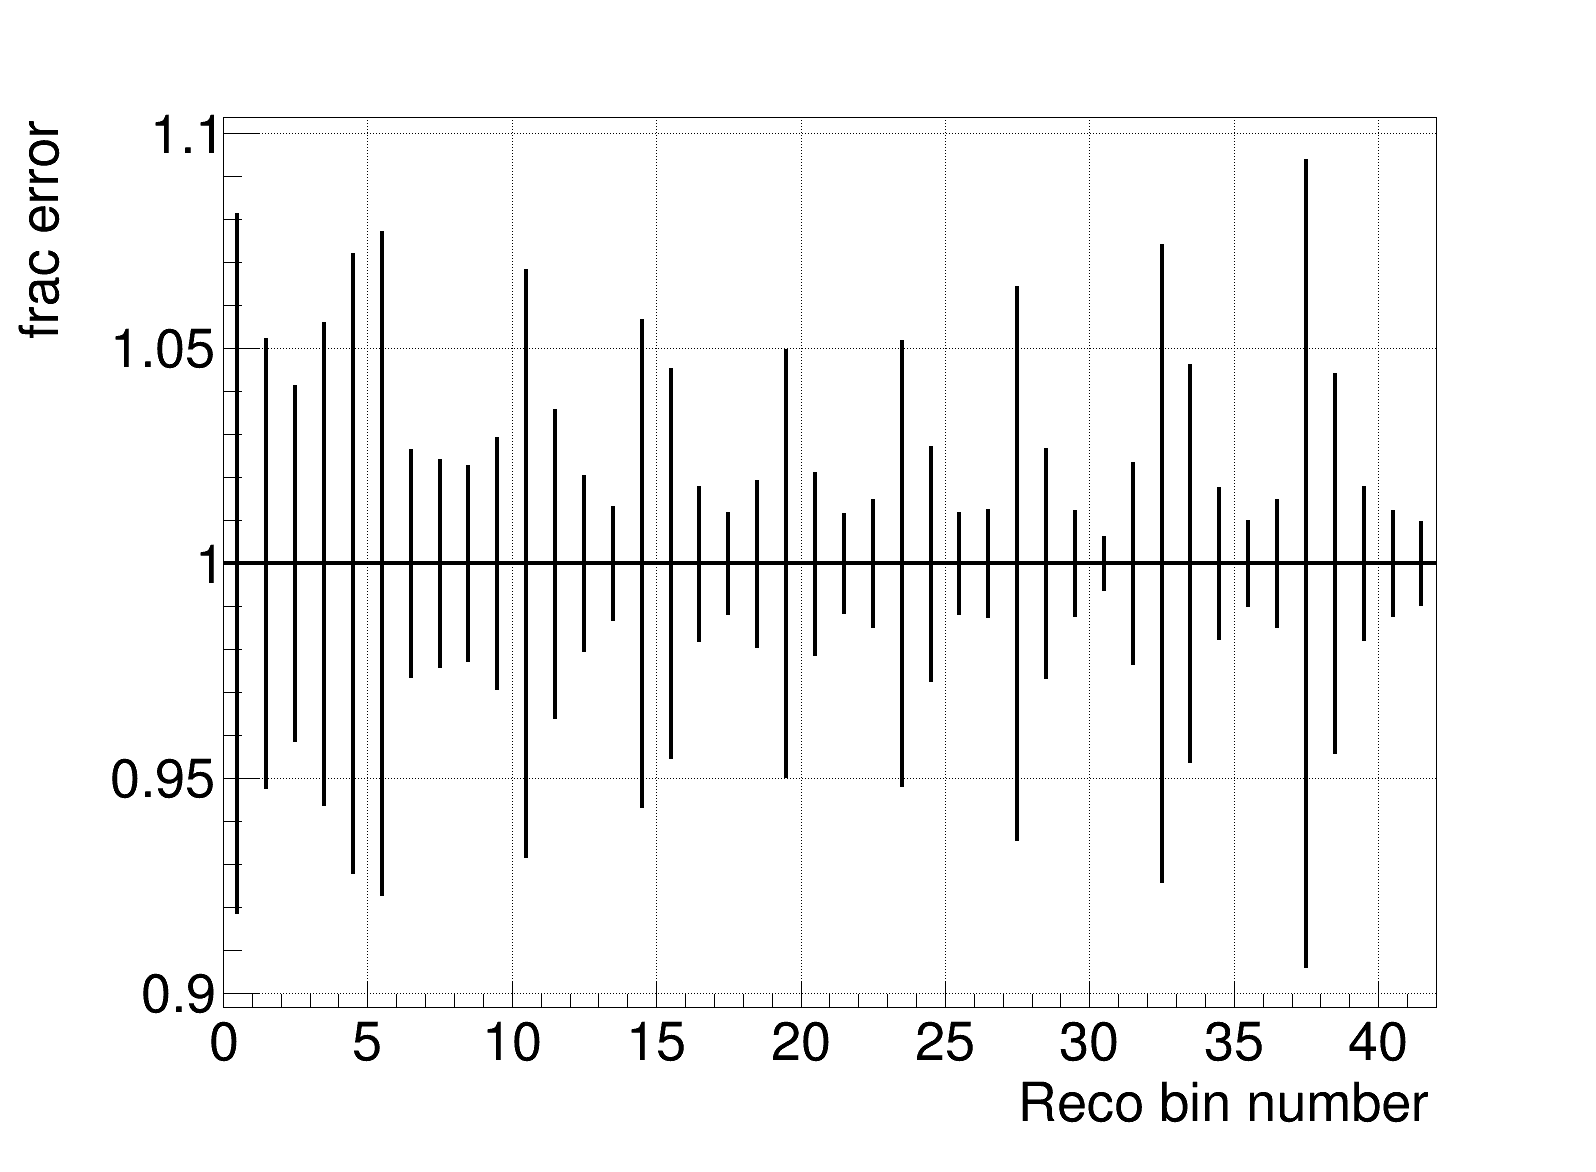

In [20]:
h_true = h_true_g3_tune.Clone()
#frac_all = return_all_covar(h_true,pot)
frac_all = np.load('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/plots/'+'frac_det_all.npy')

h_frac = FF.plot_err_array(frac_all)
h_frac.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_all'+".png")
c1.SaveAs(outputdir_root + 'frac_err_all'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_all'+".pdf")

In [21]:
this_pot = pot

path_all = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'
f_all = ROOT.TFile.Open(path_all+'FF_detsys.root', 'read')

#path_all2 = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
#f_all2 = ROOT.TFile.Open(path_all2+'xsec_2D_Run3_wighted.root', 'read')
#ext_vec = np.zeros((num_bins))
#dirt_vec = np.zeros((num_bins))
#for t_bin in range(len_theta): #len_theta
h_ext = f_all.Get('h_ext_cv')
h_dirt = f_all.Get('h_dirt_cv')
h_bkg_cv = f_all.Get('h_bkg_all_cv')
ext_vec = FF.plot2arr(h_ext,1)
dirt_vec = FF.plot2arr(h_dirt,1)

h_bkg_cv.Scale(this_pot/7.644e+18)
h_smear_cv = f_all.Get('h_smearing_all_cv')
#h_eff_cv = f_all.Get('h_eff_all_cv')
#h_eff_cv.SetBinContent(5,1)
#h_eff_cv.SetBinContent(10,1)

num_bins = h_smear_cv.GetNbinsX()
smear_mat = FF.plot2arr(h_smear_cv,2)
h_true = h_true_g3_tune.Clone()
true_vec = FF.plot2arr(h_true,1)
bkg_vec = FF.plot2arr(h_bkg_cv,1)

reco_vec = true_vec.dot(smear_mat)

h_tot_cv = FF.arr2plot(reco_vec+bkg_vec+ext_vec+dirt_vec)

num_universe = 600

bkg_vec_all = np.zeros((num_universe,num_bins))
reco_vec_all = np.zeros((num_universe,num_bins))
smear_mat_all = np.zeros((num_universe,num_bins,num_bins))

res_vec_all = np.zeros((num_universe,num_bins))

h_bkg_all = []
h_smear_all = []
h_eff_all = []
h_tot_all = []
for uni in range(100):
    #do something
    h_bkg_all.append(f_all.Get('h_bkg_all['+str(uni)+'];1'))
    h_bkg_all[uni].Scale(this_pot/7.644e+18)
    h_smear_all.append(f_all.Get('h_smearing_all['+str(uni)+']'))
    bkg_vec_all[uni] = FF.plot2arr(h_bkg_all[uni],1)
    smear_mat_all[uni] = FF.plot2arr(h_smear_all[uni],2)
    
    reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])
    print reco_vec_all[uni][10]+bkg_vec_all[uni][10]
    res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)
    h_tot_all.append(FF.arr2plot(reco_vec_all[uni] + bkg_vec_all[uni] +ext_vec+dirt_vec))
    #del h_this

print 'finished'

107.88258471941295
91.32527208846383
98.13369310994597
107.5885225557808
102.0419563692613
107.38749961210272
112.85711200577165
101.82556508593433
102.2286020904328
109.20237236424667
122.47352297598027
114.9334268270341
120.77282041077027
108.71773215716676
109.12339420354749
121.17446357939457
103.96986790134883
101.83191191669285
119.21560288817967
101.58709517032298
112.4447962563006
104.58920186815519
126.71563695696
93.62544759119575
112.49151330933731
107.5052138434574
111.75152083945316
107.52009251581867
101.55476788121679
110.35088802666459
117.68847920130412
108.28116026643266
112.08411176875461
94.16287885583343
99.91607656443715
119.38264174727885
98.84122286524382
93.22913549540434
104.0052730196074
99.59667457859763
96.80149720850599
112.44958617366206
101.92132246699467
96.23028342074176
102.72818483191872
107.64485733022951
92.68967026529292
129.55575860428945
100.41224361608107
105.33374404422497
103.27637617425125
113.61905710860037
106.85242282868654
116.6811853352

Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory

In [22]:
'''for uni in range(100,200):
    #do something
    h_bkg_all.append(f_all.Get('h_bkg_all['+str(uni)+']'))
    h_bkg_all[uni].Scale(this_pot/7.644e+18)
    h_smear_all.append(f_all.Get('h_smearing_all['+str(uni)+']'))
    bkg_vec_all[uni] = FF.plot2arr(h_bkg_all[uni],1)
    smear_mat_all[uni] = FF.plot2arr(h_smear_all[uni],2)
    
    reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])
    #print reco_vec_all[uni][10]
    res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)
    h_tot_all.append(FF.arr2plot(reco_vec_all[uni] + bkg_vec_all[uni] +ext_vec+dirt_vec))
 '''

"for uni in range(100,200):\n    #do something\n    h_bkg_all.append(f_all.Get('h_bkg_all['+str(uni)+']'))\n    h_bkg_all[uni].Scale(this_pot/7.644e+18)\n    h_smear_all.append(f_all.Get('h_smearing_all['+str(uni)+']'))\n    bkg_vec_all[uni] = FF.plot2arr(h_bkg_all[uni],1)\n    smear_mat_all[uni] = FF.plot2arr(h_smear_all[uni],2)\n    \n    reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])\n    #print reco_vec_all[uni][10]\n    res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)\n    h_tot_all.append(FF.arr2plot(reco_vec_all[uni] + bkg_vec_all[uni] +ext_vec+dirt_vec))\n "

In [23]:
'''for uni in range(200,300):
    #do something
    h_bkg_all.append(f_all.Get('h_bkg_all['+str(uni)+']'))
    h_bkg_all[uni].Scale(this_pot/7.644e+18)
    h_smear_all.append(f_all.Get('h_smearing_all['+str(uni)+']'))
    bkg_vec_all[uni] = FF.plot2arr(h_bkg_all[uni],1)
    smear_mat_all[uni] = FF.plot2arr(h_smear_all[uni],2)
    
    reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])
    #print reco_vec_all[uni][10]
    res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)
    h_tot_all.append(FF.arr2plot(reco_vec_all[uni] + bkg_vec_all[uni] +ext_vec+dirt_vec))
 '''

"for uni in range(200,300):\n    #do something\n    h_bkg_all.append(f_all.Get('h_bkg_all['+str(uni)+']'))\n    h_bkg_all[uni].Scale(this_pot/7.644e+18)\n    h_smear_all.append(f_all.Get('h_smearing_all['+str(uni)+']'))\n    bkg_vec_all[uni] = FF.plot2arr(h_bkg_all[uni],1)\n    smear_mat_all[uni] = FF.plot2arr(h_smear_all[uni],2)\n    \n    reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])\n    #print reco_vec_all[uni][10]\n    res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)\n    h_tot_all.append(FF.arr2plot(reco_vec_all[uni] + bkg_vec_all[uni] +ext_vec+dirt_vec))\n "

In [24]:
'''for uni in range(300,400):
    #do something
    h_bkg_all.append(f_all.Get('h_bkg_all['+str(uni)+']'))
    h_bkg_all[uni].Scale(this_pot/7.644e+18)
    h_smear_all.append(f_all.Get('h_smearing_all['+str(uni)+']'))
    bkg_vec_all[uni] = FF.plot2arr(h_bkg_all[uni],1)
    smear_mat_all[uni] = FF.plot2arr(h_smear_all[uni],2)
    
    reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])
    #print reco_vec_all[uni][10]
    res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)
    h_tot_all.append(FF.arr2plot(reco_vec_all[uni] + bkg_vec_all[uni] +ext_vec+dirt_vec))
 '''

"for uni in range(300,400):\n    #do something\n    h_bkg_all.append(f_all.Get('h_bkg_all['+str(uni)+']'))\n    h_bkg_all[uni].Scale(this_pot/7.644e+18)\n    h_smear_all.append(f_all.Get('h_smearing_all['+str(uni)+']'))\n    bkg_vec_all[uni] = FF.plot2arr(h_bkg_all[uni],1)\n    smear_mat_all[uni] = FF.plot2arr(h_smear_all[uni],2)\n    \n    reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])\n    #print reco_vec_all[uni][10]\n    res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)\n    h_tot_all.append(FF.arr2plot(reco_vec_all[uni] + bkg_vec_all[uni] +ext_vec+dirt_vec))\n "

In [25]:
'''for uni in range(400,500):
    #do something
    h_bkg_all.append(f_all.Get('h_bkg_all['+str(uni)+']'))
    h_bkg_all[uni].Scale(this_pot/7.644e+18)
    h_smear_all.append(f_all.Get('h_smearing_all['+str(uni)+']'))
    bkg_vec_all[uni] = FF.plot2arr(h_bkg_all[uni],1)
    smear_mat_all[uni] = FF.plot2arr(h_smear_all[uni],2)
    
    reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])
    #print reco_vec_all[uni][10]
    res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)
    h_tot_all.append(FF.arr2plot(reco_vec_all[uni] + bkg_vec_all[uni] +ext_vec+dirt_vec))
 '''

"for uni in range(400,500):\n    #do something\n    h_bkg_all.append(f_all.Get('h_bkg_all['+str(uni)+']'))\n    h_bkg_all[uni].Scale(this_pot/7.644e+18)\n    h_smear_all.append(f_all.Get('h_smearing_all['+str(uni)+']'))\n    bkg_vec_all[uni] = FF.plot2arr(h_bkg_all[uni],1)\n    smear_mat_all[uni] = FF.plot2arr(h_smear_all[uni],2)\n    \n    reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])\n    #print reco_vec_all[uni][10]\n    res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)\n    h_tot_all.append(FF.arr2plot(reco_vec_all[uni] + bkg_vec_all[uni] +ext_vec+dirt_vec))\n "

In [26]:
'''for uni in range(500,600):
    #do something
    h_bkg_all.append(f_all.Get('h_bkg_all['+str(uni)+']'))
    h_bkg_all[uni].Scale(this_pot/7.644e+18)
    h_smear_all.append(f_all.Get('h_smearing_all['+str(uni)+']'))
    bkg_vec_all[uni] = FF.plot2arr(h_bkg_all[uni],1)
    smear_mat_all[uni] = FF.plot2arr(h_smear_all[uni],2)
    
    reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])
    #print reco_vec_all[uni][10]
    res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)
    h_tot_all.append(FF.arr2plot(reco_vec_all[uni] + bkg_vec_all[uni] +ext_vec+dirt_vec))
 '''

"for uni in range(500,600):\n    #do something\n    h_bkg_all.append(f_all.Get('h_bkg_all['+str(uni)+']'))\n    h_bkg_all[uni].Scale(this_pot/7.644e+18)\n    h_smear_all.append(f_all.Get('h_smearing_all['+str(uni)+']'))\n    bkg_vec_all[uni] = FF.plot2arr(h_bkg_all[uni],1)\n    smear_mat_all[uni] = FF.plot2arr(h_smear_all[uni],2)\n    \n    reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])\n    #print reco_vec_all[uni][10]\n    res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)\n    h_tot_all.append(FF.arr2plot(reco_vec_all[uni] + bkg_vec_all[uni] +ext_vec+dirt_vec))\n "

In [27]:
'''
legend = ROOT.TLegend(0.13,0.6,0.45,0.9); #LEGEND LEFT
legend.SetNColumns(2)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)

c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

#h_tot_cv = h_reco.Clone()
legend.AddEntry(h_tot_cv,'CV, All Genie sys.',"lep")
legend.AddEntry(h_tot_all[0],'All Genie Universes',"f")
for j in range(1,h_tot_cv.GetNbinsX()+1):
    h_tot_cv.SetBinError(j,math.sqrt(h_tot_cv.GetBinContent(j)*h_tot_cv.GetBinContent(j)*frac_all[j-1][j-1]))
    #print j, h_tot_cv.GetBinContent(j), h_tot_cv.GetBinError(j)
h_tot_cv.GetYaxis().SetLabelSize(0.06);
h_tot_cv.GetYaxis().SetTitleSize(0.06);
h_tot_cv.GetYaxis().SetTitleOffset(0.8);
h_tot_cv.GetXaxis().SetLabelOffset(999);
h_tot_cv.GetXaxis().SetTitleOffset(999);
h_tot_cv.GetXaxis().SetLabelSize(0);
h_tot_cv.GetXaxis().SetTitleSize(0);
h_tot_cv.SetMaximum(3000)
h_tot_cv.SetXTitle('Bin number')
h_tot_cv.SetYTitle('number of events')
#h_covariance.SetLineColor(ROOT.kBlack)
h_tot_cv.SetLineWidth(2)
ROOT.gStyle.SetEndErrorSize(5)
h_tot_cv.Draw('E1')
h_b = FF.histBkg(h_tot_cv.Clone())
h_b.Draw('hist same')
legend.Draw()
h_tot_cv.Draw('E1 same')
h_col0 = ROOT.TH2F('h_col','h_col',43,0,43,200,0,3000)
for i in range(num_universe):
    h_tot_all[i].SetLineColor(ROOT.kBlue)
    h_tot_all[i].SetLineWidth(4)
    #h_tot_all[i].Draw('hist same')
    for j in range(num_bins):
        h_col0.Fill(j,h_tot_all[i].GetBinContent(j+1))
    
h_tot_cv.SetLineColor(ROOT.kBlack)
h_col0.Draw('colz same')
h_tot_cv.Draw("E1 hist same")

prelim, pot_tex = FF.draw_adding()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_tot_cv.GetXaxis().SetLabelOffset(0);
h_tot_cv.GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
h_files2 = []
h_files2_cv = h_tot_cv.Clone()
h_ = h_tot_cv.Clone()
h_col = ROOT.TH2F('h_col','h_col',43,0,43,100,0.8,1.2)
for j in range(num_bins):
    h_.SetBinError(j+1,0)
    #h_files2_cv.SetBinError(j+1,0)
h_files2_cv.Divide(h_)
h_files2_cv.SetYTitle('Data/(Ext+MC)')
h_files2_cv.GetYaxis().SetTitleSize(0.1)
h_files2_cv.GetYaxis().SetTitleOffset(0.3)
h_files2_cv.GetYaxis().SetLabelSize(0.07)

h_files2_cv.GetXaxis().SetTitleSize(0.15)
h_files2_cv.GetXaxis().SetLabelSize(0.15)
h_files2_cv.GetXaxis().SetTitleOffset(1)
h_files2_cv.SetMinimum(0.8)
h_files2_cv.SetMaximum(1.2)
h_files2_cv.Draw('hist')
h_b.Draw('same hist')
for i in range(num_universe):
    h_files2.append(h_tot_all[i].Clone())
    h_files2[i].Divide(h_tot_cv)
    #h_files2[i].Draw('hist same')
    for j in range(num_bins):
        h_col.Fill(j,h_files2[i].GetBinContent(j+1))

h_col.Draw('colz same')
h_files2_cv.Draw('E1 same')
c1.Draw()


c1.SaveAs(outputdir_png + "h_xsec_allsys_ratio.png")
c1.SaveAs(outputdir_pdf + "h_xsec_allsys_ratio.pdf")
c1.SaveAs(outputdir_root + "h_xsec_allsys_ratio.root")

'''

'\nlegend = ROOT.TLegend(0.13,0.6,0.45,0.9); #LEGEND LEFT\nlegend.SetNColumns(2)\nc1 = ROOT.TCanvas("c1","c1",1600,1200)\nc1.SetGrid(1)\nc1.SetLeftMargin(0.14)\nc1.SetRightMargin(0.1)\nc1.SetBottomMargin(0.1)\n\nc1.cd()\npad1 = ROOT.TPad(\'pad1\',\'pad1\',0,0.35,1,1)\npad1.SetGrid(1)\npad1.Draw()\npad1.cd()\npad1.SetBottomMargin(0.03);\npad1.SetTopMargin(0.1)\n\n#h_tot_cv = h_reco.Clone()\nlegend.AddEntry(h_tot_cv,\'CV, All Genie sys.\',"lep")\nlegend.AddEntry(h_tot_all[0],\'All Genie Universes\',"f")\nfor j in range(1,h_tot_cv.GetNbinsX()+1):\n    h_tot_cv.SetBinError(j,math.sqrt(h_tot_cv.GetBinContent(j)*h_tot_cv.GetBinContent(j)*frac_all[j-1][j-1]))\n    #print j, h_tot_cv.GetBinContent(j), h_tot_cv.GetBinError(j)\nh_tot_cv.GetYaxis().SetLabelSize(0.06);\nh_tot_cv.GetYaxis().SetTitleSize(0.06);\nh_tot_cv.GetYaxis().SetTitleOffset(0.8);\nh_tot_cv.GetXaxis().SetLabelOffset(999);\nh_tot_cv.GetXaxis().SetTitleOffset(999);\nh_tot_cv.GetXaxis().SetLabelSize(0);\nh_tot_cv.GetXaxis().SetTit

In [28]:
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_geniesys/png/frac_err_other.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_geniesys/root/frac_err_other.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_geniesys/pdf/frac_err_other.pdf has been created


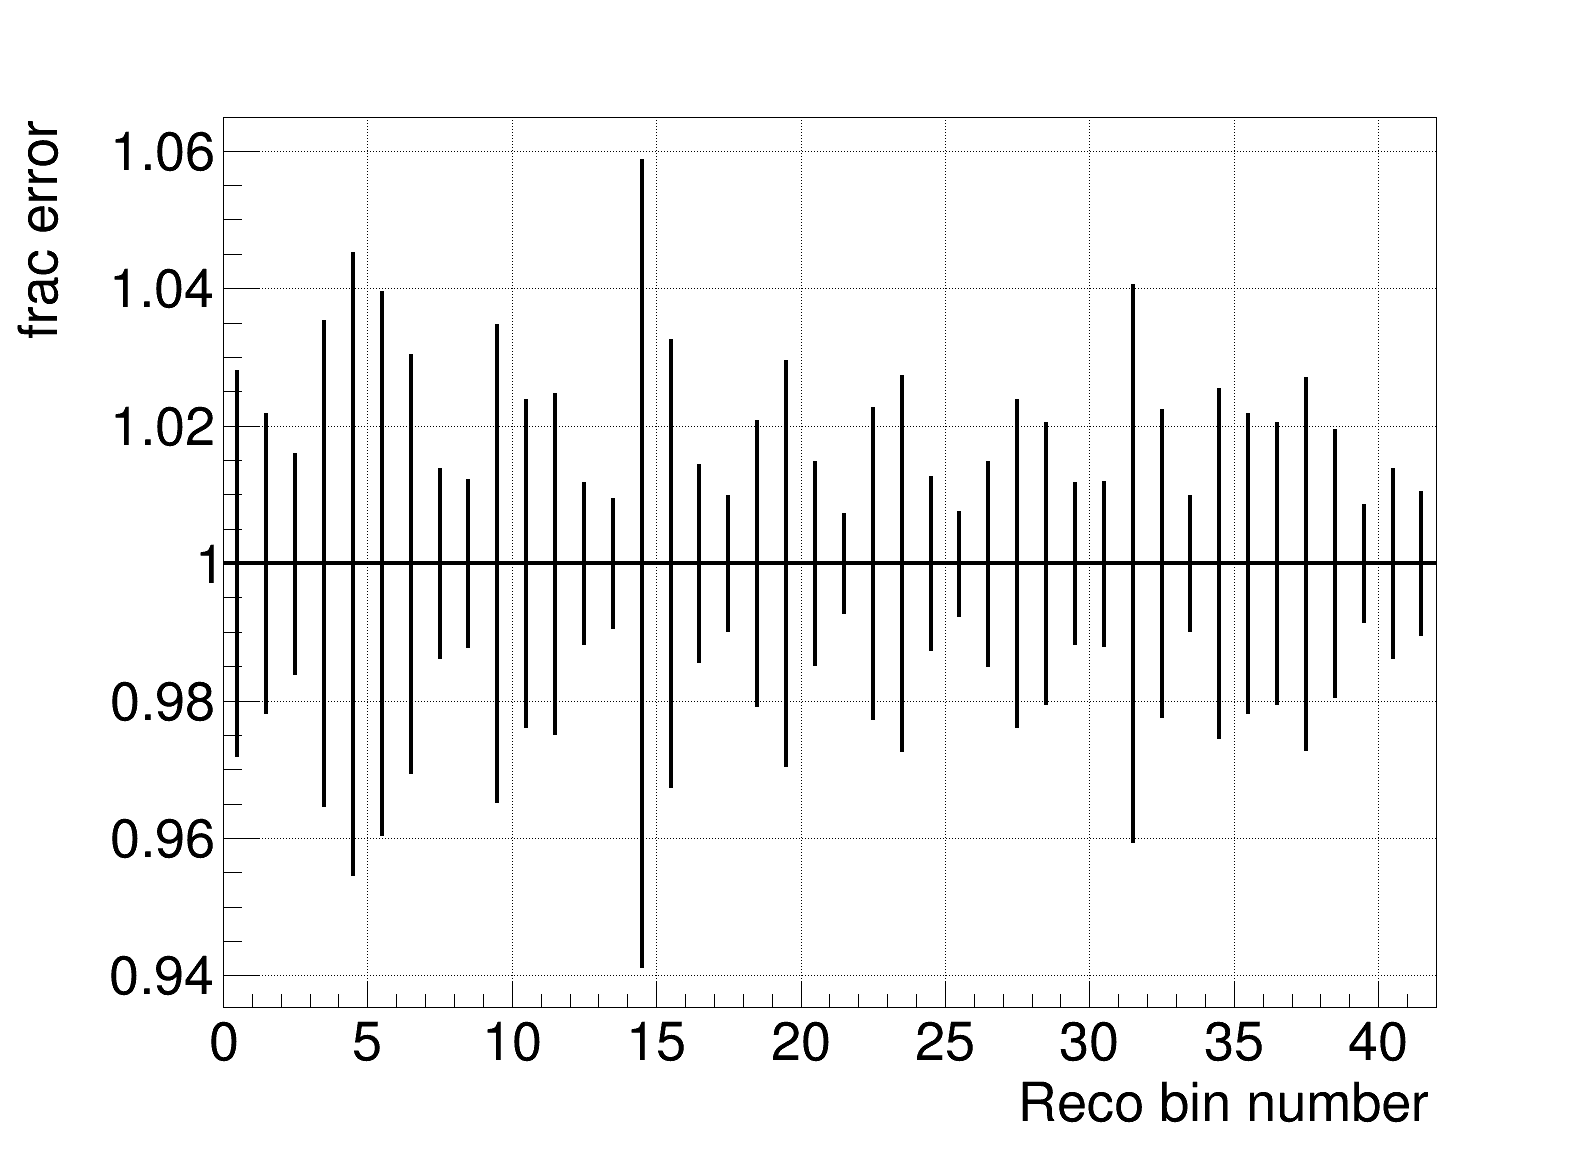

In [29]:
h_true = h_true_g3_tune.Clone()
#frac_other = return_other_covar(h_true,pot)
frac_other = np.load('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/plots/'+'frac_other.npy')
h_frac_other = FF.plot_err_array(frac_other)
h_frac_other.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_other'+".png")
c1.SaveAs(outputdir_root + 'frac_err_other'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_other'+".pdf")

In [33]:
weight_list = [ 'AxFFCCQEshape_UBGenie' , 'DecayAngMEC_UBGenie', 'NormCCCOH_UBGenie', 'NormNCCOH_UBGenie',\
               'RPA_CCQE_UBGenie','ThetaDelta2NRad_UBGenie','Theta_Delta2Npi_UBGenie',\
                'VecFFCCQEshape_UBGenie','XSecShape_CCMEC_UBGenie']
w_list = [0,1,2,3,4,5,6,7,8]

path_other = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'
f_other = ROOT.TFile.Open(path_other+'FF_detsys.root', 'read')

#path_other2 = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
#f_other2 = ROOT.TFile.Open(path_other2+'xsec_2D_Run3_wighted.root', 'read')
h_ext = f_all.Get('h_ext_cv')
h_dirt = f_all.Get('h_dirt_cv')
#h_ext.Scale(this_pot/2.144e+20)
#h_dirt.Scale(this_pot/2.144e+20)
ext_vec = FF.plot2arr(h_ext,1)
dirt_vec = FF.plot2arr(h_dirt,1)

h_smear_cv = f_all.Get('h_smearing_all_cv')
#h_eff_cv = f_all.Get('h_eff_all_cv')
#h_eff_cv.SetBinContent(5,1)
#h_eff_cv.SetBinContent(10,1)

num_bins = h_smear_cv.GetNbinsX()
smear_mat = FF.plot2arr(h_smear_cv,2)
h_true = h_true_g3_tune.Clone()
true_vec = FF.plot2arr(h_true,1)




h_true_cv = h_true.Clone()
num_bins = h_true_cv.GetNbinsX()
h_tot_other = []

for i,w in enumerate(w_list):
    h_tot_other.append([])
    #take first uiverse as cv
    h_bkg_cv = f_other.Get('h_bkg_other['+str(w)+'][0]')
    h_bkg_cv.Scale(this_pot/7.644e+18)
    h_smear_cv = f_other.Get('h_smear_other['+str(w)+'][0]')

    h_bkg_1 = f_other.Get('h_bkg_other['+str(w)+'][1]')
    h_bkg_1.Scale(this_pot/7.644e+18)
    h_smear_1 = f_other.Get('h_smear_other['+str(w)+'][1]')

    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))

    smear_mat1 = np.zeros((num_bins,num_bins))
    bkg_vec1 = np.zeros((num_bins))

    for j in range(num_bins):
        true_vec[j] = h_true_cv.GetBinContent(j+1)
        bkg_vec[j] = h_bkg_cv.GetBinContent(j+1)

        bkg_vec1[j] = h_bkg_1.GetBinContent(j+1)
        for k in range(num_bins):
            smear_mat[j][k]= h_smear_cv.GetBinContent(j+1,k+1)#*h_eff_cv.GetBinContent(k+1)
            smear_mat1[j][k]= h_smear_1.GetBinContent(j+1,k+1)#*h_eff_1.GetBinContent(k+1)

    reco_vec = true_vec.dot(smear_mat)
    reco_vec1 = true_vec.dot(smear_mat1)

    #res_vec_other = ((reco_vec+bkg_vec) - (reco_vec1 + bkg_vec1))/(reco_vec+bkg_vec+ext_vec+dirt_vec)
    h_tot_other[i].append(FF.arr2plot(reco_vec+bkg_vec+ext_vec+dirt_vec))
    h_tot_other[i].append(FF.arr2plot(reco_vec1 + bkg_vec1 +ext_vec+dirt_vec))


Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory

1 218.516647339 6.13212511018
2 897.83770752 19.644946929
3 577.163879395 9.28431765006
4 257.515319824 9.12131686565
5 109.862510681 4.97915706286
6 183.082778931 7.2397292482
7 835.708068848 25.4860161025
8 794.203796387 10.9547986347
9 260.155883789 3.16448184655
10 97.27684021 3.38473615878
11 139.311553955 3.31999599013
12 739.704956055 18.354173037
13 1086.96350098 12.84742971
14 596.111694336 5.6274156124
15 72.1890640259 4.24357277695
16 860.526245117 28.0279302617
17 1152.43261719 16.5959872279
18 972.996337891 9.57230504969
19 153.432601929 3.18522588813
20 927.728942871 27.442159104
21 1252.10058594 18.6146242715
22 1557.18493652 11.335427962
23 404.379974365 9.18245259786
24 797.44934082 21.8618177523
25 1216.89013672 15.4789072783
26 2141.36376953 16.3389341086
27 1067.72131348 15.9161367323
28 582.961975098 13.9066031795
29 942.278808594 19.3251634418
30 2190.69116211 25.7130085988
31 1796.18347168 21.5679592877
32 290.838287354 11.812573646
33 470.196014404 10.5493288132

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_geniesys/png/h_xsec_genie_other_ratio.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_geniesys/pdf/h_xsec_genie_other_ratio.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_geniesys/root/h_xsec_genie_other_ratio.root has been created


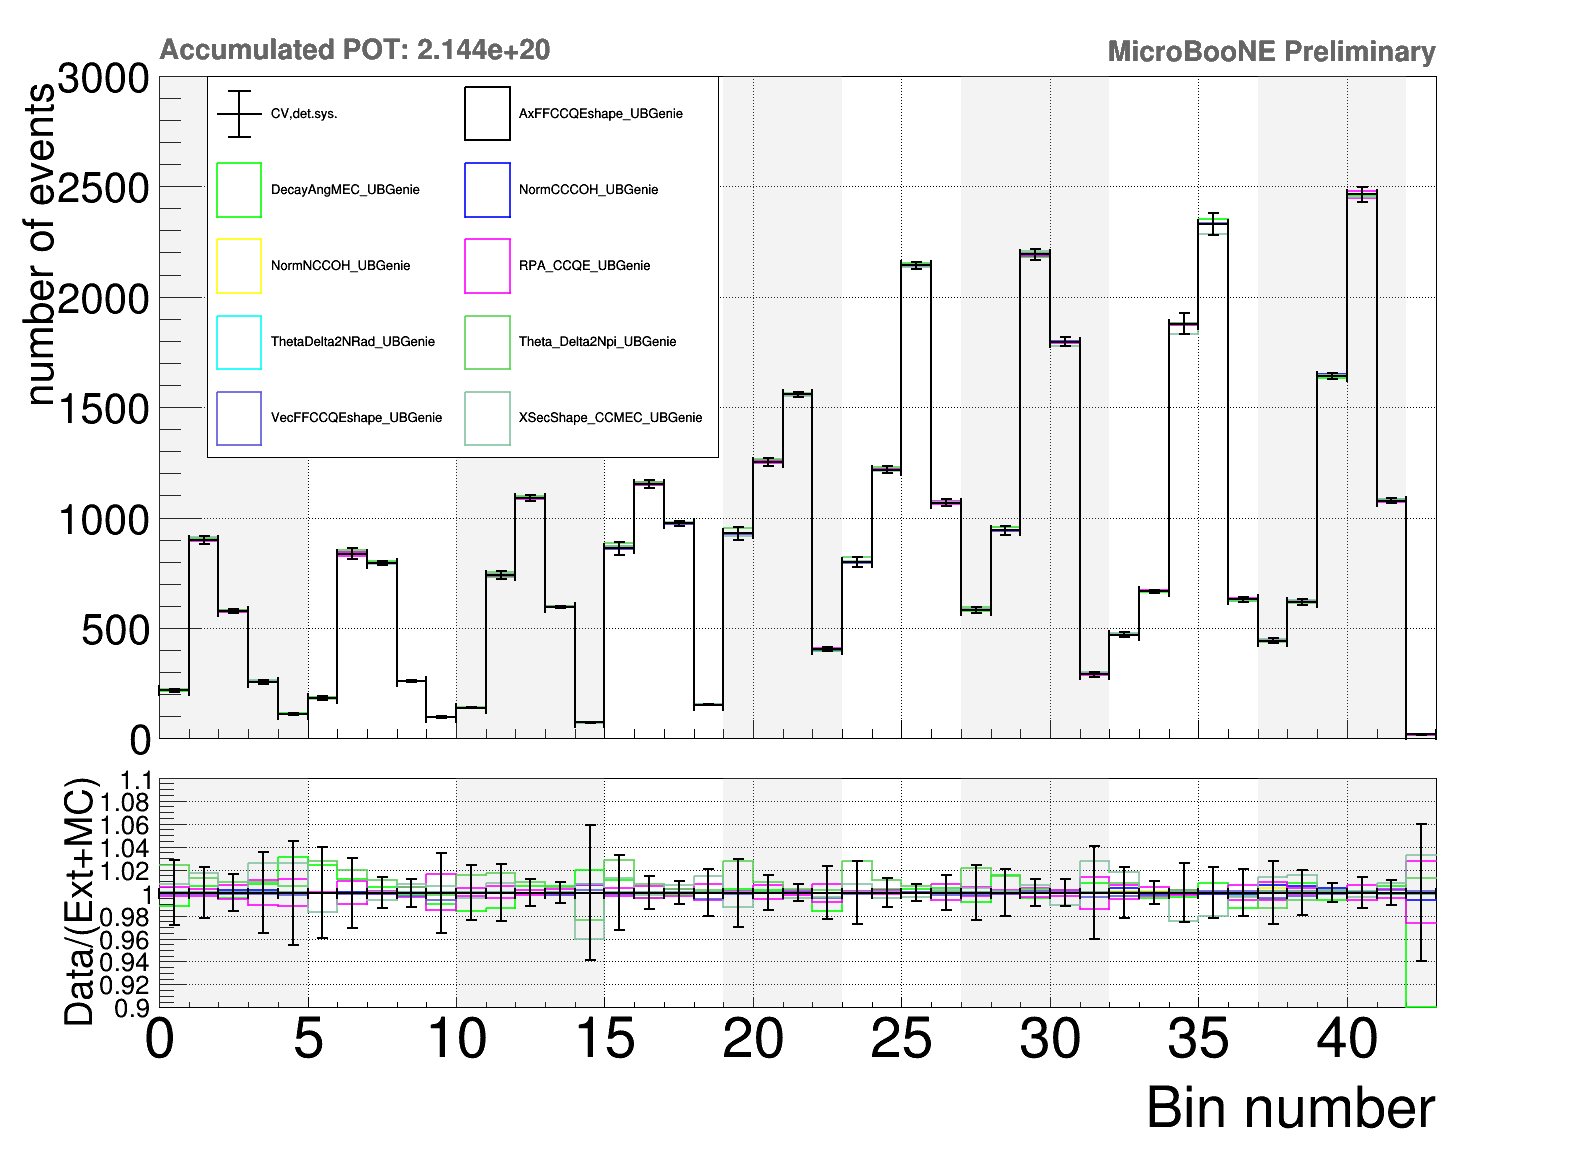

In [35]:

i = 0

legend = ROOT.TLegend(0.13,0.4,0.45,0.9); #LEGEND LEFT
legend.SetNColumns(2)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)

c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

#h_tot_cv = h_reco.Clone()
legend.AddEntry(h_tot_other[0][0],'CV,det.sys.',"lep")
for j in range(1,h_tot_other[0][0].GetNbinsX()+1):
    h_tot_other[0][0].SetBinError(j,math.sqrt(h_tot_other[0][0].GetBinContent(j)*h_tot_other[0][0].GetBinContent(j)*frac_other[j-1][j-1]))
    print j, h_tot_other[0][0].GetBinContent(j), h_tot_other[0][0].GetBinError(j)
h_tot_other[0][0].GetYaxis().SetLabelSize(0.06);
h_tot_other[0][0].GetYaxis().SetTitleSize(0.06);
h_tot_other[0][0].GetYaxis().SetTitleOffset(0.8);
h_tot_other[0][0].GetXaxis().SetLabelOffset(999);
h_tot_other[0][0].GetXaxis().SetTitleOffset(999);
h_tot_other[0][0].GetXaxis().SetLabelSize(0);
h_tot_other[0][0].GetXaxis().SetTitleSize(0);
h_tot_other[0][0].SetMaximum(3000)
h_tot_other[0][0].SetXTitle('Bin number')
h_tot_other[0][0].SetYTitle('number of events')
#h_covariance.SetLineColor(ROOT.kBlack)
h_tot_other[0][0].SetLineWidth(2)
ROOT.gStyle.SetEndErrorSize(5)
h_tot_other[0][0].Draw('E1')
h_b = FF.histBkg(h_tot_cv.Clone())
h_b.Draw('hist same')
legend.Draw()
h_tot_other[0][0].Draw('E1 same')
for i,x in enumerate(weight_list):
    h_tot_other[i][0].SetLineColorAlpha(i+2,0.8)
    h_tot_other[i][0].SetLineWidth(2)
    if (i+2)==10:
        h_tot_other[i][0].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_tot_other[i][0],str(x),"f")
    h_tot_other[i][0].Draw("hist same")
    
    h_tot_other[i][1].SetLineColorAlpha(i+2,0.8)
    h_tot_other[i][1].SetLineWidth(2)
    if (i+2)==10:
        h_tot_other[i][1].SetLineColorAlpha(30,0.8)
    #legend.AddEntry(h_tot_other[i][0],x,"f")
    h_tot_other[i][1].Draw("hist same")
    
    
    #i+=1
h_tot_other[0][0].SetLineColor(ROOT.kBlack)
h_tot_other[0][0].Draw("E1 hist same")
#h_ext_cv.Draw('same')
#h_dirt_cv.Draw('same')
#legend.Draw()
prelim, pot_tex = FF.draw_adding()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_tot_other[0][0].GetXaxis().SetLabelOffset(0);
h_tot_other[0][0].GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
h_files2 = []
h_files3 = []
h_files2_cv = h_tot_other[0][0].Clone()
h_ = h_tot_other[0][0].Clone()
for j in range(num_bins):
    h_.SetBinError(j+1,0)
    #h_files2_cv.SetBinError(j+1,0)
h_files2_cv.Divide(h_)
h_files2_cv.SetYTitle('Data/(Ext+MC)')
h_files2_cv.GetYaxis().SetTitleSize(0.1)
h_files2_cv.GetYaxis().SetTitleOffset(0.3)
h_files2_cv.GetYaxis().SetLabelSize(0.07)

h_files2_cv.GetXaxis().SetTitleSize(0.15)
h_files2_cv.GetXaxis().SetLabelSize(0.15)
h_files2_cv.GetXaxis().SetTitleOffset(1)
h_files2_cv.SetMinimum(0.9)
h_files2_cv.SetMaximum(1.1)
h_files2_cv.Draw('hist')
h_b.Draw('same hist')

for i,x in enumerate(weight_list):
    #h_files2.append(h_.Clone())
    #h_files2[i].Divide(h_tot_det[i])
    h_files2.append(h_tot_other[i][0].Clone())
    h_files2[i].Divide(h_tot_other[0][0])
    h_files2[i].SetLineColorAlpha(i+2,0.8)
    if (i+2)==10:
        h_files2[i].SetLineColorAlpha(30,0.8)
    h_files2[i].Draw('hist same')
    
    h_files3.append(h_tot_other[i][1].Clone())
    h_files3[i].Divide(h_tot_other[0][0])
    h_files3[i].SetLineColorAlpha(i+2,0.8)
    if (i+2)==10:
        h_files3[i].SetLineColorAlpha(30,0.8)
    h_files3[i].Draw('hist same')

h_files2_cv.Draw('E1 same')
c1.Draw()


c1.SaveAs(outputdir_png + "h_xsec_genie_other_ratio.png")
c1.SaveAs(outputdir_pdf + "h_xsec_genie_other_ratio.pdf")
c1.SaveAs(outputdir_root + "h_xsec_genie_other_ratio.root")

